In [1]:
import numpy as np
import networkx as nx
import pandas as pd
from tqdm import tqdm

In [2]:
train_data = pd.read_csv('/Users/vahid/data/recommender/train_interactions.csv')

In [81]:
train_data_sample = train_data.sample(n=10000000, random_state=10)

In [82]:
notif2id = {}
id2notif = {}

user2id = {}
id2user = {}

links = []
_id = 0
for index, row in tqdm(train_data_sample.iterrows()):
    if not row.notif_id in notif2id:
        id2notif[_id] = row.notif_id
        notif2id[row.notif_id] = _id
        _id += 1
    
    
    links.append((row.user_id, notif2id[row.notif_id]))
print(len(links), len(user2id), len(id2user), len(notif2id), len(id2notif))

10000000it [15:07, 11024.41it/s]

10000000 0 0 4440 4440


In [83]:
notif2user = {}
for user_id, notif_id in tqdm(links):
    if not notif_id in notif2user:
        notif2user[notif_id] = set()
    notif2user[notif_id].add(user_id)


100%|██████████| 10000000/10000000 [00:14<00:00, 688323.53it/s]

In [84]:
ma = np.zeros([len(notif2user), len(notif2user)])

for idx1 in tqdm(range(len(notif2user))):
    for idx2 in range(len(notif2user)):
        if idx2 < idx1:
            users1 = notif2user[idx1]
            users2 = notif2user[idx2]
            intersection = users1.intersection(users2)
            ma[idx1,idx2] = len(intersection)
            ma[idx2,idx1] = len(intersection)
#             ma[idx1,idx2] = 1
#             ma[idx2,idx1] = 1


 23%|██▎       | 1015/4440 [00:42<02:21, 24.17it/s]


 37%|███▋      | 1637/4440 [01:29<02:32, 18.33it/s]


 50%|████▉     | 2215/4440 [02:22<02:23, 15.50it/s]


 62%|██████▏   | 2742/4440 [03:18<02:02, 13.83it/s]


 72%|███████▏  | 3199/4440 [04:09<01:36, 12.80it/s]


 83%|████████▎ | 3679/4440 [04:59<01:02, 12.27it/s]


 91%|█████████▏| 4056/4440 [05:46<00:32, 11.72it/s]


100%|██████████| 4440/4440 [06:24<00:00, 11.55it/s]

In [85]:
g = nx.from_numpy_matrix(ma)

In [110]:
NODES = len(g.nodes())
_max = ma.max()
output = ''
for i in tqdm(range(NODES)):
    for j in range(NODES):
        if ma[i,j] > 2.550710575440305:
#                 pass
            output += str(i) + ' ' + str(j) + ' ' + str(ma[i,j] / _max) + '\n'
with open('/Users/vahid/Desktop/projects/snap/examples/node2vec/graph/notifs_sample10M.txt','w') as f:
    f.write(output)


100%|██████████| 4440/4440 [00:11<00:00, 371.61it/s]

In [ ]:
nx.write_edgelist()

In [109]:
print(ma.mean(), ma.min(), ma.max())
print(len(g.nodes()), len(g.edges()))

2.550710575440305 0.0 1943.0
4440 3489470


In [56]:
from node2vec import Node2Vec
node2vec = Node2Vec(g, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs

# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)



Computing transition probabilities:   0%|          | 0/4440 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 1/4440 [00:00<13:13,  5.60it/s]

Computing transition probabilities:   0%|          | 3/4440 [00:00<08:45,  8.44it/s]

Computing transition probabilities:   0%|          | 4/4440 [00:00<08:44,  8.46it/s]

Computing transition probabilities:   0%|          | 6/4440 [00:00<07:23,  9.99it/s]

Computing transition probabilities:   0%|          | 7/4440 [00:00<08:55,  8.28it/s]

Computing transition probabilities:   0%|          | 8/4440 [00:01<11:01,  6.70it/s]

Computing transition probabilities:   0%|          | 10/4440 [00:01<10:08,  7.28it/s]

Computing transition probabilities:   0%|          | 11/4440 [00:01<10:03,  7.34it/s]

Computing transition probabilities:   0%|          | 12/4440 [00:01<10:08,  7.28it/s]

Computing transition probabilities:   0%|          | 13/4440 [00:01<10:09,  7.26it/s]

Computing transition probabilities:   0%|          | 14/

Computing transition probabilities:   7%|▋         | 321/4440 [00:37<08:06,  8.47it/s]

Computing transition probabilities:   7%|▋         | 323/4440 [00:38<08:05,  8.49it/s]

Computing transition probabilities:   7%|▋         | 325/4440 [00:38<08:06,  8.45it/s]

Computing transition probabilities:   7%|▋         | 327/4440 [00:38<08:05,  8.47it/s]

Computing transition probabilities:   7%|▋         | 329/4440 [00:38<08:03,  8.50it/s]

Computing transition probabilities:   7%|▋         | 331/4440 [00:38<08:02,  8.52it/s]

Computing transition probabilities:   8%|▊         | 333/4440 [00:38<08:00,  8.55it/s]

Computing transition probabilities:   8%|▊         | 335/4440 [00:39<07:59,  8.56it/s]

Computing transition probabilities:   8%|▊         | 337/4440 [00:39<07:58,  8.58it/s]

Computing transition probabilities:   8%|▊         | 340/4440 [00:39<07:56,  8.61it/s]

Computing transition probabilities:   8%|▊         | 343/4440 [00:39<07:53,  8.65it/s]

Computing transition probabiliti

Computing transition probabilities:  15%|█▍        | 661/4440 [01:17<07:25,  8.49it/s]

Computing transition probabilities:  15%|█▍        | 663/4440 [01:18<07:24,  8.49it/s]

Computing transition probabilities:  15%|█▍        | 665/4440 [01:18<07:27,  8.44it/s]

Computing transition probabilities:  15%|█▌        | 667/4440 [01:19<07:27,  8.43it/s]

Computing transition probabilities:  15%|█▌        | 669/4440 [01:19<07:26,  8.44it/s]

Computing transition probabilities:  15%|█▌        | 671/4440 [01:19<07:26,  8.44it/s]

Computing transition probabilities:  15%|█▌        | 673/4440 [01:19<07:25,  8.45it/s]

Computing transition probabilities:  15%|█▌        | 675/4440 [01:20<07:26,  8.43it/s]

Computing transition probabilities:  15%|█▌        | 676/4440 [01:20<07:26,  8.42it/s]

Computing transition probabilities:  15%|█▌        | 678/4440 [01:20<07:26,  8.43it/s]

Computing transition probabilities:  15%|█▌        | 681/4440 [01:20<07:24,  8.45it/s]

Computing transition probabiliti

Computing transition probabilities:  24%|██▍       | 1072/4440 [01:50<05:48,  9.66it/s]

Computing transition probabilities:  24%|██▍       | 1074/4440 [01:51<05:48,  9.67it/s]

Computing transition probabilities:  24%|██▍       | 1076/4440 [01:51<05:47,  9.67it/s]

Computing transition probabilities:  24%|██▍       | 1078/4440 [01:51<05:48,  9.66it/s]

Computing transition probabilities:  24%|██▍       | 1082/4440 [01:51<05:46,  9.69it/s]

Computing transition probabilities:  24%|██▍       | 1084/4440 [01:51<05:46,  9.69it/s]

Computing transition probabilities:  24%|██▍       | 1086/4440 [01:52<05:45,  9.69it/s]

Computing transition probabilities:  25%|██▍       | 1088/4440 [01:52<05:45,  9.70it/s]

Computing transition probabilities:  25%|██▍       | 1092/4440 [01:52<05:44,  9.72it/s]

Computing transition probabilities:  25%|██▍       | 1094/4440 [01:52<05:44,  9.73it/s]

Computing transition probabilities:  25%|██▍       | 1096/4440 [01:52<05:43,  9.73it/s]

Computing transition 

Computing transition probabilities:  34%|███▍      | 1506/4440 [02:20<04:33, 10.72it/s]

Computing transition probabilities:  34%|███▍      | 1509/4440 [02:20<04:33, 10.72it/s]

Computing transition probabilities:  34%|███▍      | 1511/4440 [02:20<04:33, 10.73it/s]

Computing transition probabilities:  34%|███▍      | 1513/4440 [02:21<04:33, 10.71it/s]

Computing transition probabilities:  34%|███▍      | 1517/4440 [02:21<04:32, 10.73it/s]

Computing transition probabilities:  34%|███▍      | 1521/4440 [02:21<04:31, 10.74it/s]

Computing transition probabilities:  34%|███▍      | 1523/4440 [02:21<04:31, 10.74it/s]

Computing transition probabilities:  34%|███▍      | 1526/4440 [02:21<04:31, 10.75it/s]

Computing transition probabilities:  34%|███▍      | 1528/4440 [02:22<04:30, 10.75it/s]

Computing transition probabilities:  35%|███▍      | 1532/4440 [02:22<04:30, 10.77it/s]

Computing transition probabilities:  35%|███▍      | 1534/4440 [02:22<04:29, 10.77it/s]

Computing transition 

Computing transition probabilities:  45%|████▌     | 2011/4440 [02:48<03:23, 11.94it/s]

Computing transition probabilities:  45%|████▌     | 2014/4440 [02:48<03:22, 11.95it/s]

Computing transition probabilities:  45%|████▌     | 2019/4440 [02:48<03:22, 11.97it/s]

Computing transition probabilities:  46%|████▌     | 2022/4440 [02:48<03:21, 11.98it/s]

Computing transition probabilities:  46%|████▌     | 2025/4440 [02:48<03:21, 11.98it/s]

Computing transition probabilities:  46%|████▌     | 2028/4440 [02:49<03:21, 11.99it/s]

Computing transition probabilities:  46%|████▌     | 2031/4440 [02:49<03:20, 12.00it/s]

Computing transition probabilities:  46%|████▌     | 2034/4440 [02:49<03:20, 12.00it/s]

Computing transition probabilities:  46%|████▌     | 2037/4440 [02:49<03:20, 12.01it/s]

Computing transition probabilities:  46%|████▌     | 2040/4440 [02:49<03:19, 12.02it/s]

Computing transition probabilities:  46%|████▌     | 2043/4440 [02:49<03:19, 12.02it/s]

Computing transition 

Computing transition probabilities:  58%|█████▊    | 2596/4440 [03:14<02:18, 13.35it/s]

Computing transition probabilities:  59%|█████▊    | 2599/4440 [03:14<02:17, 13.36it/s]

Computing transition probabilities:  59%|█████▊    | 2603/4440 [03:14<02:17, 13.37it/s]

Computing transition probabilities:  59%|█████▊    | 2606/4440 [03:14<02:17, 13.37it/s]

Computing transition probabilities:  59%|█████▉    | 2609/4440 [03:14<02:16, 13.38it/s]

Computing transition probabilities:  59%|█████▉    | 2613/4440 [03:15<02:16, 13.39it/s]

Computing transition probabilities:  59%|█████▉    | 2616/4440 [03:15<02:16, 13.39it/s]

Computing transition probabilities:  59%|█████▉    | 2620/4440 [03:15<02:15, 13.41it/s]

Computing transition probabilities:  59%|█████▉    | 2624/4440 [03:15<02:15, 13.42it/s]

Computing transition probabilities:  59%|█████▉    | 2628/4440 [03:15<02:14, 13.43it/s]

Computing transition probabilities:  59%|█████▉    | 2631/4440 [03:15<02:14, 13.43it/s]

Computing transition 

Computing transition probabilities:  72%|███████▏  | 3213/4440 [03:39<01:23, 14.65it/s]

Computing transition probabilities:  72%|███████▏  | 3217/4440 [03:39<01:23, 14.66it/s]

Computing transition probabilities:  73%|███████▎  | 3221/4440 [03:39<01:23, 14.67it/s]

Computing transition probabilities:  73%|███████▎  | 3225/4440 [03:39<01:22, 14.68it/s]

Computing transition probabilities:  73%|███████▎  | 3229/4440 [03:39<01:22, 14.69it/s]

Computing transition probabilities:  73%|███████▎  | 3232/4440 [03:40<01:22, 14.69it/s]

Computing transition probabilities:  73%|███████▎  | 3235/4440 [03:40<01:22, 14.69it/s]

Computing transition probabilities:  73%|███████▎  | 3238/4440 [03:40<01:21, 14.69it/s]

Computing transition probabilities:  73%|███████▎  | 3242/4440 [03:40<01:21, 14.70it/s]

Computing transition probabilities:  73%|███████▎  | 3248/4440 [03:40<01:20, 14.72it/s]

Computing transition probabilities:  73%|███████▎  | 3252/4440 [03:40<01:20, 14.73it/s]

Computing transition 

Computing transition probabilities:  90%|████████▉ | 3981/4440 [04:03<00:28, 16.35it/s]

Computing transition probabilities:  90%|████████▉ | 3985/4440 [04:03<00:27, 16.36it/s]

Computing transition probabilities:  90%|████████▉ | 3989/4440 [04:03<00:27, 16.37it/s]

Computing transition probabilities:  90%|████████▉ | 3993/4440 [04:03<00:27, 16.38it/s]

Computing transition probabilities:  90%|█████████ | 3997/4440 [04:04<00:27, 16.37it/s]

Computing transition probabilities:  90%|█████████ | 4000/4440 [04:04<00:26, 16.37it/s]

Computing transition probabilities:  90%|█████████ | 4003/4440 [04:04<00:26, 16.38it/s]

Computing transition probabilities:  90%|█████████ | 4008/4440 [04:04<00:26, 16.39it/s]

Computing transition probabilities:  90%|█████████ | 4012/4440 [04:04<00:26, 16.40it/s]

Computing transition probabilities:  90%|█████████ | 4016/4440 [04:04<00:25, 16.41it/s]

Computing transition probabilities:  91%|█████████ | 4020/4440 [04:04<00:25, 16.41it/s]

Computing transition 

Generating walks (CPU: 4): 100%|██████████| 50/50 [06:37<00:00,  8.21s/it]


KeyboardInterrupt: 

In [87]:
nx.write_edgelist(G=g, path='/Users/vahid/Desktop/projects/snap/examples/node2vec/graph/notifs_sample10M.txt')

In [11]:
path = '/Users/vahid/Desktop/projects/snap/examples/node2vec/emb/out.emb'
with open(path, 'r') as f:
    d = f.read().split('\n')
emb = np.zeros([4440, 128])
for l in d[1:-1]:
    emb[int(l.split(' ')[0])] = [float(a) for a in l.split(' ')[1:]]
emb = np.array(emb)
emb.shape

(4440, 128)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [13]:
x = pca.fit_transform(emb)
x.shape

(4440, 2)

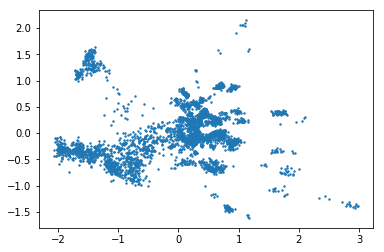

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], s=2)
plt.show()